# DAMASK tutorial
- creating necessary inputs for damask
- runing the damask jobs

here more option is given to the user to select from damask python package itself.

## Importing libraries and creating Project

In [1]:
from pyiron_continuum import Project
from damask import Rotation
%matplotlib inline

In [2]:
pr = Project("damask_proj")

## Creating the Damask job

In [3]:
job = pr.create.job.DAMASK("damask_job")

## Creating the necessary inputs

### Homogenization

In [4]:
homogenization = pr.create.DAMASK.homogenization(
    method='SX', 
    parameters={'N_constituents': 1, "mechanical": {"type": "pass"}}
)

In [5]:
homogenization = pr.continuum.damask.Homogenization(
    method='SX', 
    parameters={'N_constituents': 1, "mechanical": {"type": "pass"}}
)

### Elasticity

In [6]:
elasticity = pr.continuum.damask.Elasticity(
    type='Hooke',
    C_11=106.75e9,
    C_12=60.41e9,
    C_44=28.34e9
)

### Plasticity

In [7]:
plasticity = pr.continuum.damask.Plasticity(
    N_sl=[12],
    a_sl=2.25, 
    atol_xi=1.0,
    dot_gamma_0_sl=0.001,
    h_0_sl_sl=75e6,
    h_sl_sl=[1, 1, 1.4, 1.4, 1.4, 1.4],
    n_sl=20,
    output=['xi_sl'],
    type='phenopowerlaw',
    xi_0_sl=[31e6],
    xi_inf_sl=[63e6]
)

### Phase

In [8]:
phase = pr.continuum.damask.Phase(
    composition='Aluminum',
    lattice= 'cF',
    output_list=['F', 'P', 'F_e', 'F_p', 'L_p', 'O'],
    elasticity=elasticity,
    plasticity=plasticity
)

### Rotation

In [9]:
rotation = pr.continuum.damask.Rotation(Rotation.from_random, 10)

### Material

In [10]:
material = pr.continuum.damask.Material([rotation],['Aluminum'], phase, homogenization)

In [11]:
job.material = material

### Grid

In [12]:
grid = pr.continuum.damask.Grid.via_voronoi_tessellation(box_size=1., grid_dim=4, num_grains=10)

In [13]:
job.grid = grid

### Loading

In [14]:
load_step =[{'mech_bc_dict':{'dot_F':[1e-3,0,0, 0,'x',0,  0,0,'x'],
                            'P':['x','x','x', 'x',0,'x',  'x','x',0]},
            'discretization':{'t': 10.,'N': 40},
            'additional': {'f_out': 4}
           },{'mech_bc_dict':{'dot_F':[1e-3,0,0, 0,'x',0,  0,0,'x'],
                              'P':['x','x','x', 'x',0,'x',  'x','x',0]},
            'discretization':{'t': 60.,'N': 60},
            'additional': {'f_out': 4}
           }]

In [15]:
solver = job.list_solvers()[0]

In [16]:
job.loading = pr.continuum.damask.Loading(solver=solver, load_steps=load_step)

## Runing the job

In [17]:
job.run()

The job damask_job was saved and received the ID: 55


 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


## Post-processing

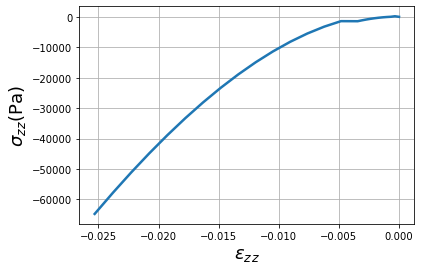

In [18]:
job.plot_stress_strain(component='zz');

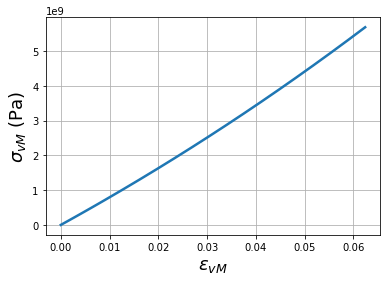

In [19]:
job.plot_stress_strain(von_mises=True);